## Задание
В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.  
Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing  

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).  

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.  

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).  

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.  

Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).  

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.  

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.  

Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.  

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import missingno as msno
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy.stats import probplot, ks_2samp
from classes_and_functions import type_features,lgb_param_rnd_test,xgb_param_rnd_test,cb_param_rnd_test
import warnings
warnings.filterwarnings('ignore')

In [3]:
patch = r'D:\train\assignment2_data/'
train= pd.read_csv(patch + 'train.csv')
target = train.isFraud
train_drop_target = train.drop('isFraud',axis = 1)


Посмотрим на данные немного

In [4]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,0,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,0,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,0,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,0,3958260,59.00,W,7726,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [6]:
numerical_features, int_features, no_int, obj_features,year_feature = type_features(train_drop_target)

датасет имеет размерность 180000 строк и 393 признаков
числовых значений в датасете 379
в том числе целочисленных 57
в том числе не целочисленных 322
объектных признаков 14
признаков типа время возможно 0


In [7]:
train_drop_target[obj_features].head(10)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T
7,W,visa,debit,mail.com,NaN,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
8,H,visa,debit,anonymous.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,W,mastercard,debit,yahoo.com,NaN,T,T,T,M0,T,T,NaN,NaN,NaN


<AxesSubplot:>

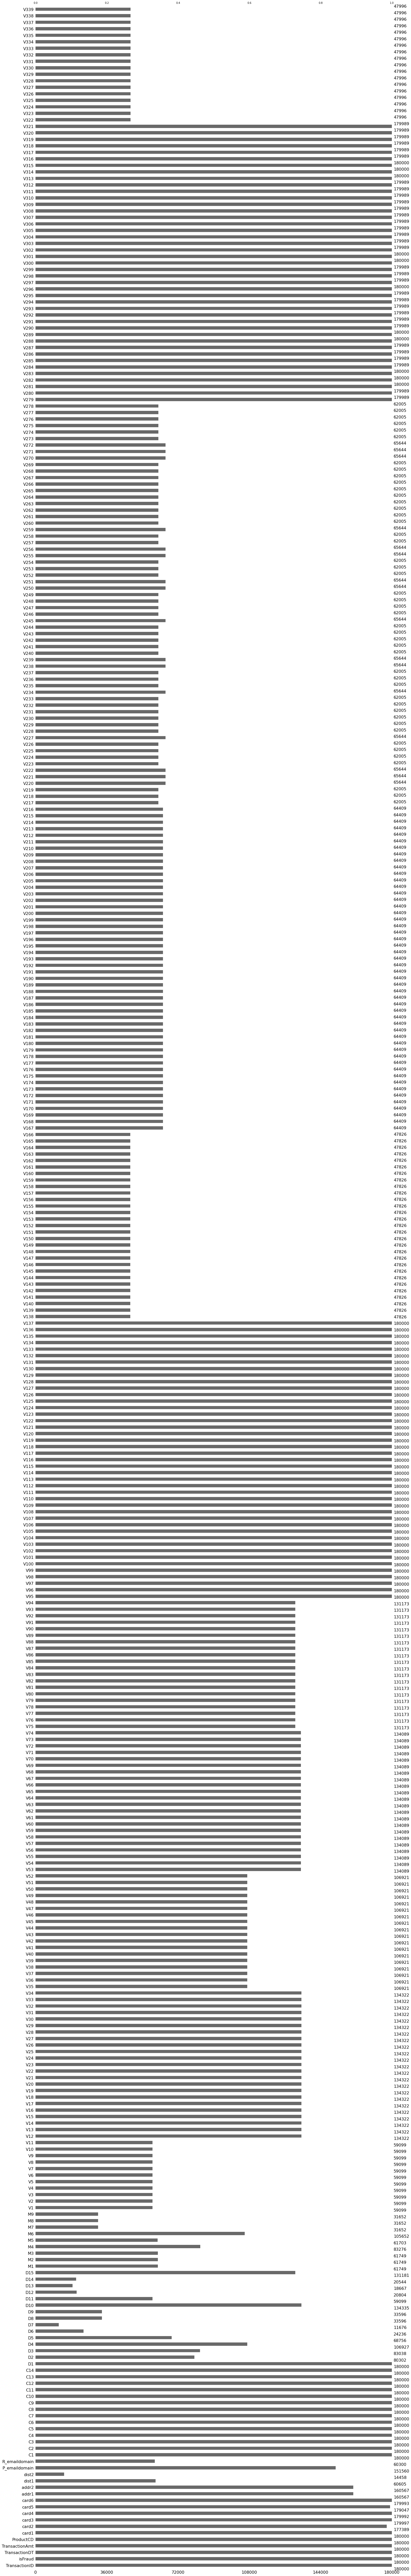

In [8]:
msno.bar(train, labels=False)

In [9]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Как видно очень много пропусков в данных

In [10]:
target.value_counts(normalize=True)

0    0.971439
1    0.028561
Name: isFraud, dtype: float64

всего 2,8 % положительного таргета. Нужно быть осторожным при  выделении  выборки

### Разобъемм выборку на тренитровочную и валидационную

In [11]:
# Сначала сделаем lab enc
for i in obj_features:
    train_drop_target[i] = train_drop_target[i].map(train_drop_target[i].value_counts())

In [12]:
train_drop_target[obj_features]

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,110340,2378.0,57229.0,NaN,NaN,61748.0,55657.0,48603.0,18658.0,34262.0,49025.0,NaN,NaN,NaN
1,110340,54501.0,57229.0,67198.0,NaN,NaN,NaN,NaN,51229.0,27441.0,49025.0,NaN,NaN,NaN
2,110340,118295.0,122746.0,1484.0,NaN,61748.0,55657.0,48603.0,51229.0,34262.0,56627.0,27118.0,19814.0,4682.0
3,110340,54501.0,122746.0,28992.0,NaN,NaN,NaN,NaN,51229.0,27441.0,56627.0,NaN,NaN,NaN
4,22422,54501.0,57229.0,67198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,110340,54501.0,122746.0,67198.0,NaN,61748.0,55657.0,13146.0,13389.0,27441.0,56627.0,NaN,NaN,NaN
179996,110340,54501.0,122746.0,28992.0,NaN,NaN,NaN,NaN,NaN,NaN,49025.0,NaN,NaN,NaN
179997,110340,54501.0,122746.0,67198.0,NaN,61748.0,55657.0,48603.0,51229.0,27441.0,56627.0,NaN,NaN,NaN
179998,110340,118295.0,122746.0,NaN,NaN,NaN,NaN,NaN,13389.0,27441.0,49025.0,NaN,NaN,NaN


In [13]:
# разобъем данные
x_train,x_valid,y_train,y_valid = train_test_split(train_drop_target,\
                                                   target,test_size = 0.2,random_state = 25,stratify = target )

In [14]:
y_train.value_counts(normalize=True)

0    0.971437
1    0.028563
Name: isFraud, dtype: float64

In [15]:
y_valid.value_counts(normalize=True)

0    0.971444
1    0.028556
Name: isFraud, dtype: float64

Распределение целевой переменной на тесте и трейне примерно похоже

### Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

#### Для каждого требуемого вараинта я буду строить две модели.  
1. Из коробки, с параметрами по умолчанию
2. С подобранными параметрами  
и записывать результаты в таблицу

In [16]:
result = pd.DataFrame(columns=['model','bosting','param','data','roc_valid','fpr', 'tpr'])

In [17]:
metrika = metrics.roc_auc_score

In [18]:
print('-'*100)

----------------------------------------------------------------------------------------------------


XGBClassifier по дефолту

In [19]:
model = xgb.XGBClassifier(use_label_encoder=False,eval_metric="auc")

In [20]:
%%time
model.fit(x_train[numerical_features],y_train)

Wall time: 15.4 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [21]:
pred = model.predict_proba(x_valid[numerical_features])[:,1]
res = metrika(y_valid,pred)
res

0.9366486518842644

In [22]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model','bosting':"XGB",\
                        'param':"Нет",'data':"Цифры",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)

In [23]:
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."


XGBClassifier с настроенными параметрами

In [24]:
params_1 = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate":0.1,
    "n_estimators": 500,
    "reg_lambda": 10,
    "max_depth": 12,
    "gamma": 1.5,
    "n_jobs": 15,
    "random_state": 27,
    'min_child_weight':2,
    'reg_alpha':1.5,
    'use_label_encoder':False,
#     'gpu_id':0,
#     'tree_method': 'gpu_hist'
}

In [25]:
model_1 = xgb.XGBClassifier(**params_1)

In [26]:
%%time
model_1.fit(x_train[numerical_features],y_train,early_stopping_rounds = 20,\
            eval_set=[(x_valid[numerical_features], y_valid)],verbose = False)

Wall time: 1min 55s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=1.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=15,
              num_parallel_tree=1, random_state=27, reg_alpha=1.5,
              reg_lambda=10, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [27]:
pred = model_1.predict_proba(x_valid[numerical_features])[:,1]
res = metrika(y_valid,pred)
res

0.950059185758835

In [28]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_1','bosting':"XGB",\
                        'param':"Да",'data':"Цифры",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)

In [29]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

XGBClassifier по дефолту

In [30]:
model_3 = xgb.XGBClassifier(use_label_encoder=False,eval_metric="auc")

In [31]:
%%time
model_3.fit(x_train,y_train)

Wall time: 15.9 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [32]:
pred = model_3.predict_proba(x_valid)[:,1]
res = metrika(y_valid,pred)
res

0.9417314841311626

In [33]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_3','bosting':"XGB",\
                        'param':"Нет",'data':"Все",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."


XGBClassifier с настроенными параметрами

In [34]:
model_2 = xgb.XGBClassifier(**params_1)

In [35]:
%%time
model_2.fit(x_train,y_train,early_stopping_rounds = 20,\
            eval_set=[(x_valid, y_valid)],verbose = False)

Wall time: 1min 46s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=1.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=15,
              num_parallel_tree=1, random_state=27, reg_alpha=1.5,
              reg_lambda=10, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [36]:
pred = model_2.predict_proba(x_valid)[:,1]
res = metrika(y_valid,pred)
res

0.9554726883229764

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_2','bosting':"XGB",\
                        'param':"Да",'data':"Все",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."


In [38]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

LGBMClassifier с параметрами по у молчанию

In [39]:
model_4 = lgb.LGBMClassifier()

In [40]:
model_4.fit(x_train[numerical_features],y_train)

LGBMClassifier()

In [41]:
pred = model_4.predict_proba(x_valid[numerical_features])[:,1]
res = metrika(y_valid,pred)
res

0.9251383736227448

In [42]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_4','bosting':"LGB",\
                        'param':"Нет",'data':"Цифры",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."


LGBMClassifier с настроенными  параметрами

In [43]:
params_3 = {
    "boosting_type": "gbdt",
    "objective": "binary",
    'num_leaves':55,
    'max_depth':7,
    'learning_rate':0.2,
    'n_estimators':800,
    "metric": "auc",
    "n_jobs": 15,
    'reg_alpha':0.5,
    'reg_lambda':0.5,
    "random_state": 27
}

In [44]:
model_5 = lgb.LGBMClassifier(**params_3)

In [45]:
%%time
model_5.fit(x_train[numerical_features],y_train,early_stopping_rounds  = 20,\
            eval_set =(x_valid[numerical_features],y_valid),verbose = False)

Wall time: 9.16 s


LGBMClassifier(learning_rate=0.2, max_depth=7, metric='auc', n_estimators=800,
               n_jobs=15, num_leaves=55, objective='binary', random_state=27,
               reg_alpha=0.5, reg_lambda=0.5)

In [46]:
pred = model_5.predict_proba(x_valid[numerical_features])[:,1]
res = metrika(y_valid,pred)
res

0.9509896410736152

In [47]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_5','bosting':"LGB",\
                        'param':"Да",'data':"Цифры",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."


In [48]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

LGBMClassifier с параметрами по у молчанию

In [49]:
model_6 = lgb.LGBMClassifier()

In [50]:
model_6.fit(x_train,y_train)

LGBMClassifier()

In [51]:
pred = model_6.predict_proba(x_valid)[:,1]
res = metrika(y_valid,pred)
res

0.9371827506474328

In [52]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_6','bosting':"LGB",\
                        'param':"Нет",'data':"Все",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."


LGBMClassifier с настроенными параметрами 

In [53]:
model_7 = lgb.LGBMClassifier(**params_3)

In [54]:
%%time
model_7.fit(x_train,y_train,early_stopping_rounds  = 20,\
            eval_set =(x_valid,y_valid),verbose = False)

Wall time: 9.18 s


LGBMClassifier(learning_rate=0.2, max_depth=7, metric='auc', n_estimators=800,
               n_jobs=15, num_leaves=55, objective='binary', random_state=27,
               reg_alpha=0.5, reg_lambda=0.5)

In [55]:
pred = model_7.predict_proba(x_valid)[:,1]
res = metrika(y_valid,pred)
res

0.9562748030553404

In [56]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_7','bosting':"LGB",\
                        'param':"Да",'data':"Все",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."


In [57]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

Эту задачу будем решать LGBMClassifier с насроенными параметрами  
Приведем категариальные признаки к типу категшория, что бы LGBMClassifier сам их обработал как категориальные

In [58]:

x_train_1 = x_train.copy()
x_train_1[obj_features] = x_train_1[obj_features].astype('category')
x_valid_1 = x_valid.copy()
x_valid_1[obj_features] = x_valid_1[obj_features].astype('category')

In [59]:
model_8 = lgb.LGBMClassifier(**params_3)


In [60]:
%%time
model_8.fit(x_train_1,y_train,early_stopping_rounds  = 20,\
            eval_set =(x_valid_1,y_valid),verbose = False)

Wall time: 10.9 s


LGBMClassifier(learning_rate=0.2, max_depth=7, metric='auc', n_estimators=800,
               n_jobs=15, num_leaves=55, objective='binary', random_state=27,
               reg_alpha=0.5, reg_lambda=0.5)

In [61]:
pred = model_8.predict_proba(x_valid_1)[:,1]
res = metrika(y_valid,pred)
res

0.9577991743033114

In [62]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_8','bosting':"LGB",\
                        'param':"Да",'data':"Собст. обр.",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."
8,model_8,LGB,Нет,Собст. обр.,0.957799,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.126459143968871..."


In [63]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

CatBoostClassifier по умолчанию

In [64]:
model_9 = cb.CatBoostClassifier()

In [65]:
%%time
model_9.fit(x_train[numerical_features],y_train,verbose=False)

Wall time: 36.1 s


In [66]:
pred = model_9.predict_proba(x_valid[numerical_features])[:,1]
res = metrika(y_valid,pred)
res

0.9264519731404912

In [67]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_9','bosting':"СB",\
                        'param':"Нет",'data':"Цифра",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."
8,model_8,LGB,Нет,Собст. обр.,0.957799,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.126459143968871..."
9,model_9,СB,Нет,Цифра,0.926452,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.055447470817120..."


CatBoostClassifier с подобраными параметрами

In [68]:
 params_cb = {
        "loss_function": "Logloss",
        "task_type": "GPU",
        'devices':'0',     
        'verbose':False , 
        "eval_metric": "AUC",
        "thread_count": 15, 
        "early_stopping_rounds": 20,
        "random_seed": 27,    
        'max_depth':12,      
        'n_estimators':1000 ,
        'learning_rate':0.1, 
        'reg_lambda':3,   
        'min_child_samples':25,    
        'max_bin':40 }

In [69]:
model_10 = cb.CatBoostClassifier(**params_cb)

In [70]:
%%time
model_10.fit(x_train[numerical_features],y_train,verbose=False)

Wall time: 1min 29s


In [71]:
pred = model_10.predict_proba(x_valid[numerical_features])[:,1]
res = metrika(y_valid,pred)
res

0.9463883502577494

In [72]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_10','bosting':"СB",\
                        'param':"Да",'data':"Цифра",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."
8,model_8,LGB,Нет,Собст. обр.,0.957799,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.126459143968871..."
9,model_9,СB,Нет,Цифра,0.926452,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.055447470817120..."


In [73]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

с  дефолтными параметрами

In [74]:
model_11 = cb.CatBoostClassifier()

In [75]:
%%time
model_11.fit(x_train,y_train,verbose=False)

Wall time: 37.4 s


In [76]:
pred = model_11.predict_proba(x_valid)[:,1]
res = metrika(y_valid,pred)
res

0.9333863978342206

In [77]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_11','bosting':"СB",\
                        'param':"Нет",'data':"Полные",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."
8,model_8,LGB,Нет,Собст. обр.,0.957799,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.126459143968871..."
9,model_9,СB,Нет,Цифра,0.926452,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.055447470817120..."


С параметрами

In [78]:
model_12 = cb.CatBoostClassifier(**params_cb)

In [79]:
%%time
model_12.fit(x_train,y_train,verbose=False)

Wall time: 1min 33s


In [80]:
pred = model_12.predict_proba(x_valid)[:,1]
res = metrika(y_valid,pred)
res

0.955715851168984

In [81]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_11','bosting':"СB",\
                        'param':"Да",'data':"Полные",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."
8,model_8,LGB,Нет,Собст. обр.,0.957799,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.126459143968871..."
9,model_9,СB,Нет,Цифра,0.926452,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.055447470817120..."


In [82]:
print('-'*100)

----------------------------------------------------------------------------------------------------


### Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [83]:
x_train_1 = x_train.copy()
x_train_1[obj_features] = x_train_1[obj_features].astype(str)
x_valid_1 = x_valid.copy()
x_valid_1[obj_features] = x_valid_1[obj_features].astype(str)

In [84]:
model_13 = cb.CatBoostClassifier(**params_cb)

In [85]:
%%time
model_13.fit(x_train_1,y_train,verbose=False)

Wall time: 4min 46s


In [86]:
pred = model_13.predict_proba(x_valid_1)[:,1]
res = metrika(y_valid,pred)
res

0.9179520798406374

In [87]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, pred)
result = result.append({'model':'model_11','bosting':"СB",\
                        'param':"Да",'data':"Собст. обр.",'roc_valid':res,'fpr':fpr,'tpr':tpr},\
                       ignore_index=True)
result

,model,bosting,param,data,roc_valid,fpr,tpr
0,model,XGB,Нет,Цифры,0.936649,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.071984435797665..."
1,model_1,XGB,Да,Цифры,0.950059,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.126459143968871..."
2,model_3,XGB,Нет,Все,0.941731,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.023346303501945..."
3,model_2,XGB,Да,Все,0.955473,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.057392996108949..."
4,model_4,LGB,Нет,Цифры,0.925138,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.021400778210116..."
5,model_5,LGB,Да,Цифры,0.950990,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.131322957198443..."
6,model_6,LGB,Нет,Все,0.937183,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.032101167315175..."
7,model_7,LGB,Да,Все,0.956275,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.129377431906614..."
8,model_8,LGB,Нет,Собст. обр.,0.957799,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.8594304014640283e-...","[0.0, 0.0009727626459143969, 0.126459143968871..."
9,model_9,СB,Нет,Цифра,0.926452,"[0.0, 0.0, 0.0, 2.8594304014640283e-05, 2.8594...","[0.0, 0.0009727626459143969, 0.055447470817120..."


In [88]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Выводы можно сделать следующие:  
    1. Результат практически одинаков на любых моделях  
    2. Наибольшый выйгрыш дает тюнинг параметров модели  
    3. Наличие или отстувие категориальных признаков сильно не влияют на результат  
    4. Ручная оброаботака категореальных признаков или встроенная так же еле заметно влияет на результат, но LGB собственная дает на еле заметно дает больший результат,  а СВ ухудщает  
    
    

### Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [89]:
def print_roc(model,X_test,X_train):

#  тест   
    preds = model.predict_proba(X_test)[:,1]            
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'test AUC = %0.2f' % roc_auc,color='red')

#     трайн
    preds = model.predict_proba(X_train)[:,1]  
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'train AUC = %0.2f' % roc_auc,color='green')

    plt.title('Receiver Operating Characteristic') 
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

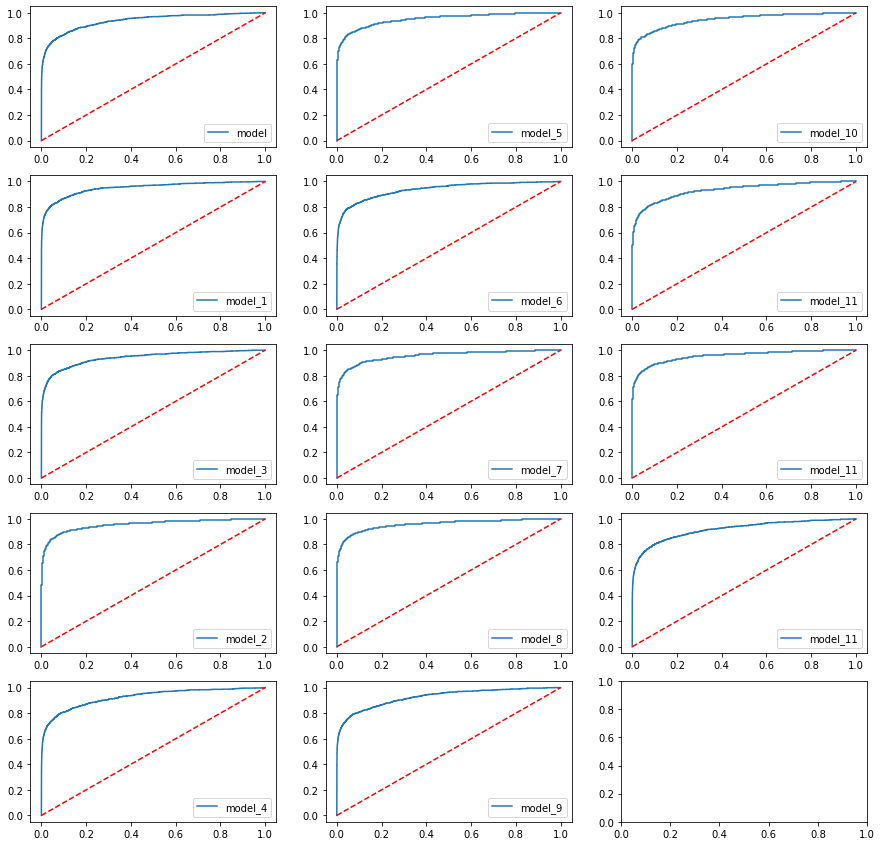

In [127]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
for num,row in enumerate(result.iterrows()):
    axes[num%5, num//5].plot(row[1]['fpr'],row[1][ 'tpr'],label = f"{row[1]['model']}")
    axes[num%5, num//5].legend()
    axes[num%5, num//5].plot([0, 1], [0, 1],'r--')
